In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Read the CSV file
df = pd.read_csv("trend_dataset.csv")
df.head()

,Date,iPhone 12 Pro,Samsung Galaxy S21,Sony PlayStation 5,Apple AirPods Pro,Nintendo Switch,Amazon Echo Dot,Fitbit Charge 4,DJI Mavic Air 2,GoPro Hero 9,...,Samsung QLED TV,Sony WH-1000XM4 Headphones,Garmin Forerunner 945,Xbox Series X,Google Pixel 5,Fitbit Versa 3,Amazon Kindle Paperwhite,Dyson V11 Vacuum,Apple Watch Series 6,LG UltraWide Monitor
0,2023-06-01,51,65,68,89,96,62,11,90,58,...,78,23,21,58,32,34,80,24,88,24
1,2023-06-02,37,19,37,10,57,13,92,84,36,...,14,13,95,15,14,78,53,68,44,27
2,2023-06-03,10,42,19,59,59,26,18,17,34,...,17,31,89,81,50,27,12,73,0,2
3,2023-06-04,46,100,37,68,84,28,64,100,88,...,62,20,32,44,42,62,34,7,49,95
4,2023-06-05,34,57,87,80,9,3,52,24,12,...,98,76,45,77,27,61,5,82,2,98


In [22]:
# Remove the "Date" column to plot only the keyword counts
df_counts = df.drop(columns="Date")

### Plot the data

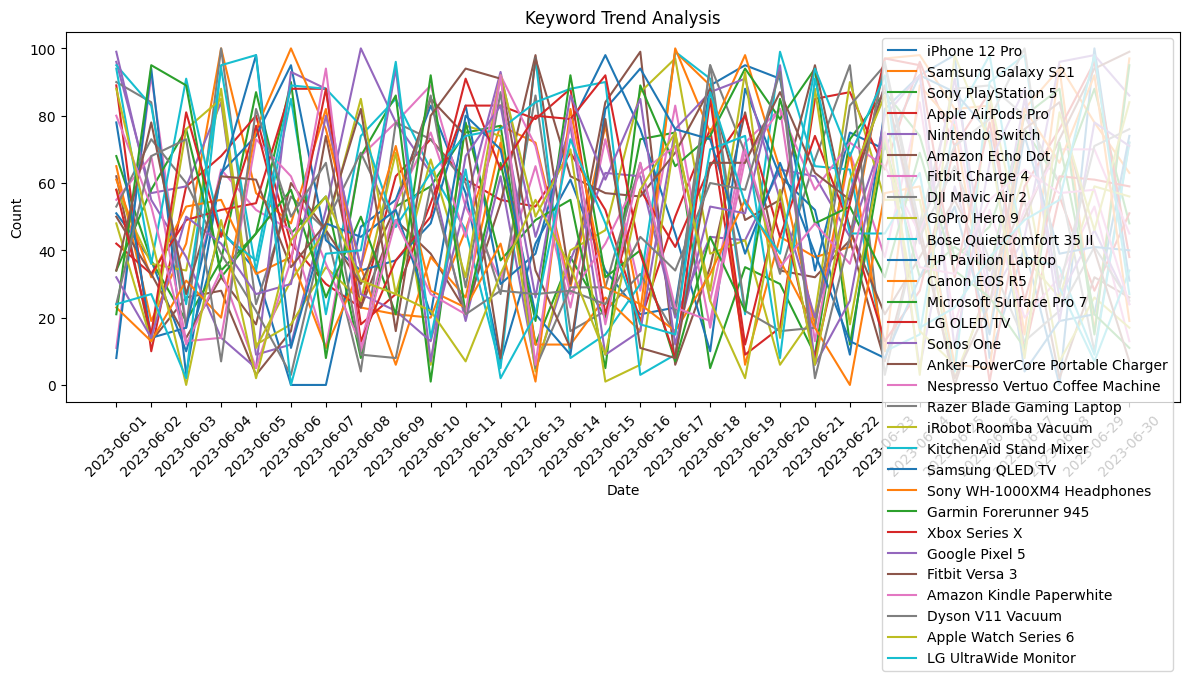

In [23]:
# Plot the data
plt.figure(figsize=(12, 6))
for keyword in df_counts.columns:
    plt.plot(df["Date"], df_counts[keyword], label=keyword)

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Keyword Trend Analysis")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Plot only selected columns

In [24]:
def plot_keywords(keyword_list):
    # Filter the dataframe to include only the specified keywords
    df_filtered = df[["Date"] + keyword_list]

    # Plot the data
    plt.figure(figsize=(12, 6))
    for keyword in keyword_list:
        plt.plot(df_filtered["Date"], df_filtered[keyword], label=keyword)

    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.title("Keyword Trend Analysis")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


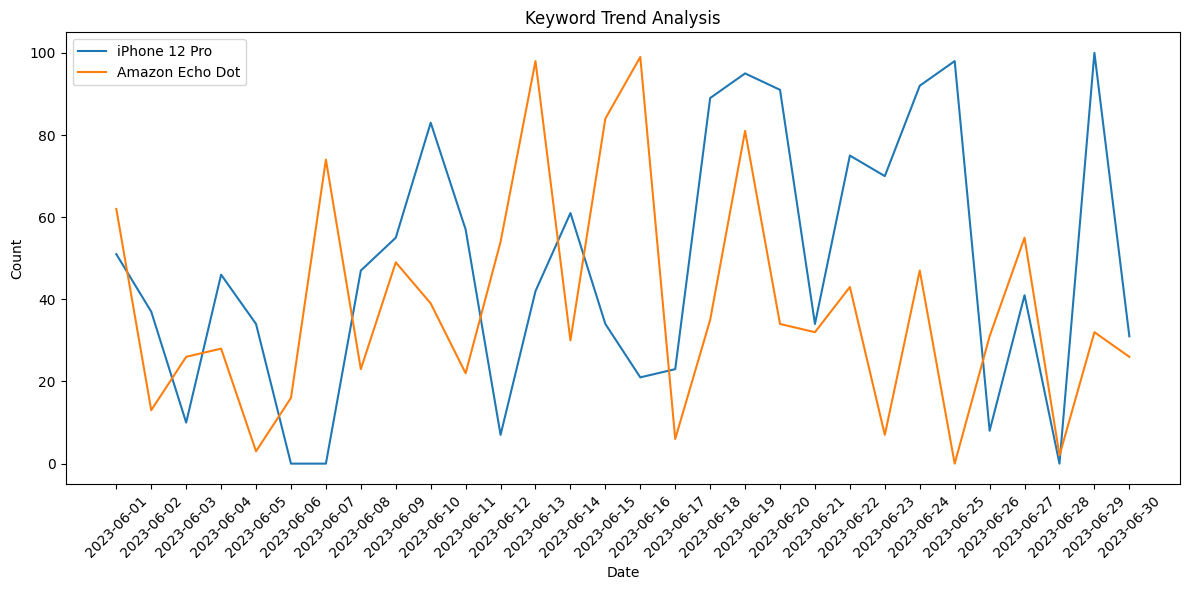

In [27]:
keywords_to_plot = ["iPhone 12 Pro", "Amazon Echo Dot"]
plot_keywords(keywords_to_plot)

### Find most searched keywords

In [28]:
def get_most_searched_keywords(start_date, end_date):
    df['Date'] = pd.to_datetime(df['Date'])
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    # Sum the search counts for each keyword across the days
    total_searches = filtered_df.iloc[:, 1:].sum()
    # Find the keyword with the highest total searches
    most_searched_keyword = total_searches.nlargest(10)
    return most_searched_keyword

In [29]:
start_date = pd.to_datetime('2023-06-01')
end_date = pd.to_datetime('2023-06-07')
top_searched = get_most_searched_keywords(start_date, end_date)
print(f'Top 10 searched keywords:')
top_searched

Top 10 searched keywords:


KitchenAid Stand Mixer     480
Bose QuietComfort 35 II    436
DJI Mavic Air 2            417
Samsung Galaxy S21         413
LG OLED TV                 406
Xbox Series X              400
Sonos One                  392
HP Pavilion Laptop         380
Apple AirPods Pro          378
Dyson V11 Vacuum           370
dtype: int64

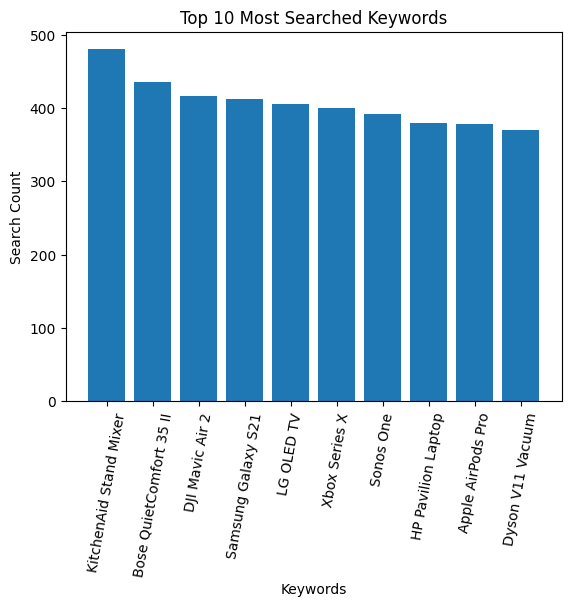

In [33]:
plt.bar(top_searched.index, top_searched.values)
plt.xlabel('Keywords')
plt.ylabel('Search Count')
plt.title('Top 10 Most Searched Keywords')
plt.xticks(rotation=80)
plt.show()